# Regression: calories burnt prediction

Dataset: [Calories burnt prediction](https://www.kaggle.com/datasets/ruchikakumbhar/calories-burnt-prediction)

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor as SKLearnGradientBoostingRegressor

%cd ..
import examples.functions.plot_functions as plot_funcs
from longer_limbs.regressors import GradientBoostingRegressor as LongerLimbsGradientBoostingRegressor

/mnt/arkk/longer-limbs


## 1. Data preparation

In [2]:
data_df = pd.read_csv('tests/data/calories.csv')
data_df.drop('User_ID', axis=1, inplace=True)

encoder = OrdinalEncoder()
data_df['Gender'] = encoder.fit_transform(data_df['Gender'].to_frame())

train_df, test_df = train_test_split(data_df)

## 2. SciKit-learn gradient boosting model

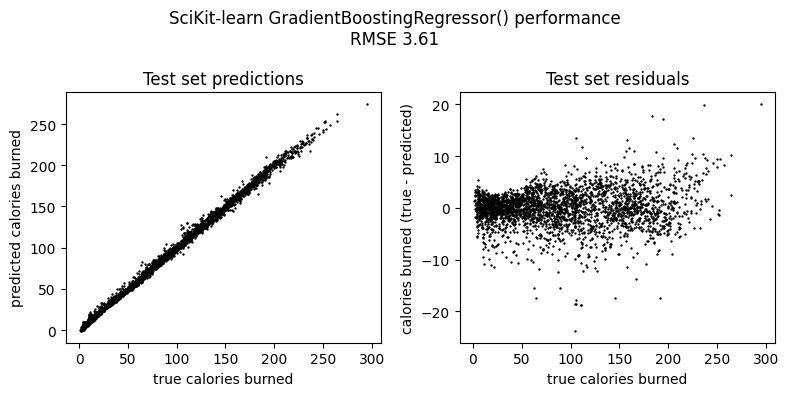

In [3]:
sklearn_model=SKLearnGradientBoostingRegressor()
fit_result=sklearn_model.fit(train_df.drop('Calories', axis=1), train_df['Calories'])
predictions=sklearn_model.predict(test_df.drop('Calories', axis=1))
labels=test_df['Calories']
rmse=root_mean_squared_error(labels, predictions)

plot_title=f'SciKit-learn GradientBoostingRegressor() performance\nRMSE {rmse:.2f}'
plot_funcs.model_eval(plot_title, 'calories burned', predictions, labels)

## 3. longer-limbs gradient boosting model

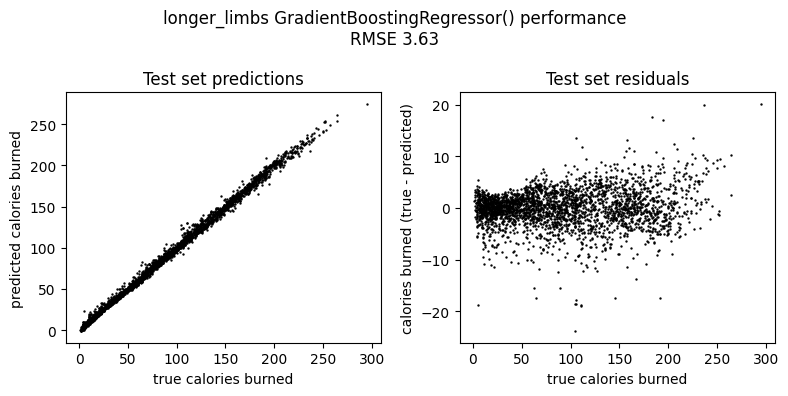

In [4]:
limbs_model=LongerLimbsGradientBoostingRegressor()
fit_result=limbs_model.fit(train_df.drop('Calories', axis=1), train_df['Calories'])
predictions=limbs_model.predict(test_df.drop('Calories', axis=1))
labels=test_df['Calories']
rmse=root_mean_squared_error(labels, predictions)

plot_title=f'longer_limbs GradientBoostingRegressor() performance\nRMSE {rmse:.2f}'
plot_funcs.model_eval(plot_title, 'calories burned', predictions, labels)

## 4. Out of range predictions

### 4.1. Generate 'out-of-range' test data

In [5]:
expanded_range_df=test_df.copy()
expanded_range_df['Duration']=[random.uniform(1.0, 45.0) for _ in range(len(expanded_range_df)) ]
expanded_range_df.describe()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,2813.000000,2813.00000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000
mean,0.499111,43.07572,174.314611,74.865979,23.149956,95.760754,40.046712,90.767863
std,0.500088,16.88528,14.352212,15.109633,12.795341,9.418211,0.755648,62.157818
min,0.000000,20.00000,123.000000,39.000000,1.021141,70.000000,37.200000,1.000000
25%,0.000000,28.00000,164.000000,63.000000,11.941092,89.000000,39.600000,36.000000
50%,0.000000,40.00000,174.000000,74.000000,23.166770,96.000000,40.200000,82.000000
75%,1.000000,56.00000,185.000000,87.000000,34.415274,103.000000,40.600000,140.000000
max,1.000000,79.00000,218.000000,132.000000,44.960881,125.000000,41.400000,295.000000


### 4.2. Evaluate both models

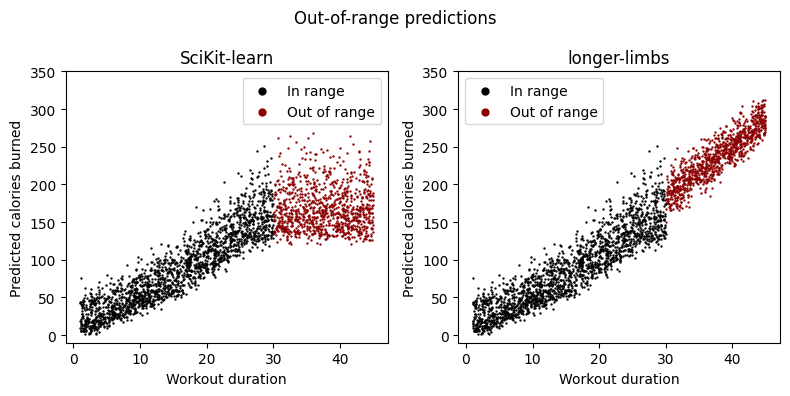

In [6]:
sklearn_predictions=sklearn_model.predict(expanded_range_df.drop('Calories', axis=1))
limbs_predictions=limbs_model.predict(expanded_range_df.drop('Calories', axis=1))

expanded_range_df['sklearn_prediction']=sklearn_predictions
expanded_range_df['limbs_prediction']=limbs_predictions
in_range_df=expanded_range_df[expanded_range_df['Duration'] <= 30]
out_range_df=expanded_range_df[expanded_range_df['Duration'] > 30]

plot_funcs.out_of_range(sklearn_predictions, limbs_predictions, expanded_range_df)